# data의 경로 설정 및 이미지 크기 정의

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# 이미지 크기 정의하기
HEIGHT = 150
WIDTH = 150
CHANNELS = 3

#  경로 설정
base_dir = 'D:/bunjang/data/여성의류'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [2]:
# 텐서플로우 내에 내장된 VGG16 불러오기
from tensorflow.keras.applications import VGG16
# VGG16의 모델층 가져오기
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(HEIGHT,WIDTH,CHANNELS))

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
# VGG16의 모델층을 우선으로 쌓기
model.add(conv_base)
# 이어서 스스로 구성한 모델층 쌓기
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))

In [5]:
model.summary()
# 훈련중 가중치가 업데이트되지 않게 막는 작업
# 마지막 두 개의 Dense 층만 사용
conv_base.trainable = False
len(model.trainable_weights)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 12)                3084      
Total params: 16,946,764
Trainable params: 16,946,764
Non-trainable params: 0
____________________________________________

8

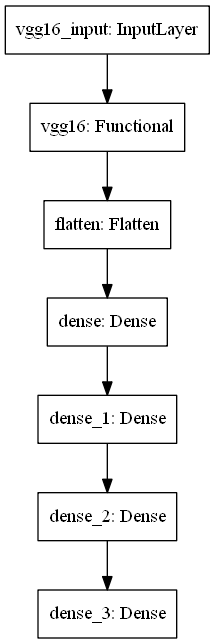

In [9]:
# 모델층 시각화
from tensorflow import keras
keras.utils.plot_model(model, 'my_first_model.png')

In [11]:
# image 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_data만 데이터 증식
train_datagen = ImageDataGenerator(
    rescale=1./255,    # 픽셀을 255로 나누어 0~1 사이 값으로 정규화
    rotation_range=10,    # 회전 범위
    width_shift_range=0.1,    # 수평으로 평행 이동
    height_shift_range=0.1,    # 수직으로 평행 이동
    shear_range=0.1,    # 임의 전단 변환 범위
    zoom_range=0.1    # 확대 및 축소 범위
)
test_datagen = ImageDataGenerator(rescale=1./255)
# target size의 HEIGHT, WIDTH는 위에서 정의해놓음
# train_dir와 test_dir, validation_dir도 위에서 정의해놓음
# train_data 데이터 증식 이후 train, test, validation 데이터 전처리
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (HEIGHT, WIDTH),
    batch_size = 5,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (HEIGHT,WIDTH),
    batch_size = 5,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (HEIGHT,WIDTH),
    batch_size = 5,
    class_mode='categorical'
)

NameError: name 'train_dir' is not defined

In [7]:
# dataset의 색깔, 종류 리스트
cloth_list = ['긴팔티셔츠', '남방', '맨투맨_후드', '면바지', '반바지', '반팔', '블라우스', 
              '스커트', '원피스', '청바지', '카디건', '트레이닝복']


# model define하기

In [ ]:
# model compile
from tensorflow.keras import optimizers
# 다중분류이므로 categorical 사용, optimizer는 'RMSprop' 사용
model.compile(loss = 'categorical_crossentropy',
optimizer = optimizers.RMSprop(lr=1e-4),
metrics=['acc'])
# RMSprop : 기울기를 단순 누적하지 않고 새로운(최신) 기술기의 정보만 반영
# 학습률이 0에 가깝게 떨어지는 것을 방지
# Adam : 가장 무난한 optimizer이며 RMSprop에서 진화

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
# EarlyStop, ModelCheck을 통해 callback 설정
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('bungejantur_the_best.h5', monitor='val_loss', mode='min', save_best_only=True)

## image 전처리하기
## folder째로 이미지들을 불러와서 정규화 및 resize, labeling 시키기

## 학습 시작하기

In [9]:
history = model.fit_generator(
    train_generator,
    # 한 epoch에 돌아가는 데이터 100개로 설정(제한)
    steps_per_epoch = 100,
    epochs = 300,
    validation_data = validation_generator,
    validation_steps = 50)
    #callbacks = [es, mc])

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
100/100 [==============================] - 110s 1s/step - loss: 2.4684 - acc: 0.1348 - val_loss: 2.2036 - val_acc: 0.3200
Epoch 2/300
100/100 [==============================] - 107s 1s/step - loss: 2.1794 - acc: 0.2638 - val_loss: 2.0371 - val_acc: 0.2640
Epoch 3/300
100/100 [==============================] - 114s 1s/step - loss: 1.8850 - acc: 0.3650 - val_loss: 1.7445 - val_acc: 0.3680
Epoch 4/300
100/100 [==============================] - 108s 1s/step - loss: 1.6703 - acc: 0.4650 - val_loss: 1.5737 - val_acc: 0.4720
Epoch 5/300
100/100 [==============================] - 104s 1s/step - loss: 1.6354 - acc: 0.4379 - val_loss: 1.5790 - val_acc: 0.4680
Epoch 6/300
100/100 [==============================] - 105s 1s/step - loss: 1.5186 - acc: 0.5181 - val_loss: 1.4970 - val_acc: 0.4720
Epoch 7/300
100/100 [==============================] - 103s 1s/step - loss: 1.4909 - acc: 0.5136 - val_loss: 1.4373 - val_acc: 0.5160
Epoch 8/300
100/100 [==============================] - 102s 1s

100/100 [==============================] - 102s 1s/step - loss: 0.5288 - acc: 0.8017 - val_loss: 0.5077 - val_acc: 0.8560
Epoch 122/300
100/100 [==============================] - 96s 963ms/step - loss: 0.5206 - acc: 0.8271 - val_loss: 0.5154 - val_acc: 0.8160
Epoch 123/300
100/100 [==============================] - 99s 989ms/step - loss: 0.7979 - acc: 0.7178 - val_loss: 0.4478 - val_acc: 0.8400
Epoch 124/300
100/100 [==============================] - 100s 1s/step - loss: 0.5485 - acc: 0.7988 - val_loss: 0.3969 - val_acc: 0.9000
Epoch 125/300
100/100 [==============================] - 98s 986ms/step - loss: 0.5307 - acc: 0.8189 - val_loss: 0.3510 - val_acc: 0.8840
Epoch 126/300
100/100 [==============================] - 108s 1s/step - loss: 0.6523 - acc: 0.7869 - val_loss: 0.3701 - val_acc: 0.8680
Epoch 127/300
100/100 [==============================] - 105s 1s/step - loss: 0.6178 - acc: 0.7799 - val_loss: 0.3846 - val_acc: 0.8560
Epoch 128/300
100/100 [==============================] -

Epoch 181/300
100/100 [==============================] - 98s 975ms/step - loss: 0.4987 - acc: 0.8141 - val_loss: 0.2313 - val_acc: 0.9240
Epoch 182/300
100/100 [==============================] - 96s 965ms/step - loss: 0.4316 - acc: 0.8600 - val_loss: 0.3242 - val_acc: 0.8920
Epoch 183/300
100/100 [==============================] - 98s 977ms/step - loss: 0.4800 - acc: 0.8812 - val_loss: 0.2309 - val_acc: 0.9360
Epoch 184/300
100/100 [==============================] - 100s 1000ms/step - loss: 0.4571 - acc: 0.8608 - val_loss: 0.3597 - val_acc: 0.8680
Epoch 185/300
100/100 [==============================] - 102s 1s/step - loss: 0.4364 - acc: 0.8478 - val_loss: 0.3264 - val_acc: 0.8840
Epoch 186/300
100/100 [==============================] - 98s 985ms/step - loss: 0.4560 - acc: 0.8468 - val_loss: 0.2482 - val_acc: 0.9120
Epoch 187/300
100/100 [==============================] - 100s 999ms/step - loss: 0.4295 - acc: 0.8887 - val_loss: 0.2832 - val_acc: 0.8920
Epoch 188/300
100/100 [==========

100/100 [==============================] - 89s 890ms/step - loss: 0.2830 - acc: 0.9041 - val_loss: 0.1293 - val_acc: 0.9520
Epoch 300/300
100/100 [==============================] - 90s 906ms/step - loss: 0.3652 - acc: 0.8835 - val_loss: 0.1295 - val_acc: 0.9600


# 결과 accuracy, loss 값 그래프 그리기

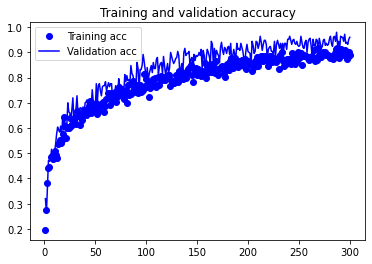

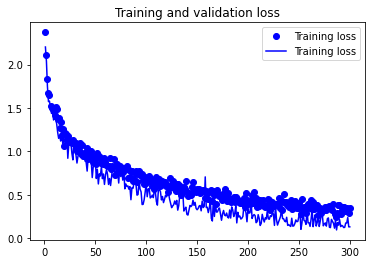

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('VGG16_01.png')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('VGG16_02.png')


# 새로운 이미지 테스트 코드

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.load_model('./beyond2.h5')

In [13]:
from PIL import Image
import numpy as np
#test_image = 'C:/Users/user/Desktop/1.jpg'
test_image = 'D:/bunjang/data/여성의류/블라우스/블라우스_1.jpg'

In [14]:
# 이미지 resize
img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((150,150))
data = np.asarray(img)

In [15]:
X = np.array(data)
X = X.astype("float") / 255
X = X.reshape(-1, 150, 150,3)

In [16]:
# 예측
pred = model.predict(X)  
result = np.argmax(pred)  # 예측 값중 가장 높은 클래스 반환
print('New data category : ',cloth_list[result])


New data category :  블라우스


In [17]:
# 모델 평가하기 
model.evaluate_generator(
    test_generator)

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1232171505689621, 0.9626623392105103]